In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('weather-stations20140101-20141231.csv')
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


- ### Clean Data
Remove rows with null Tm (Mean Temperature)

In [3]:
data = data[data['Tm'].notnull()]
data = data.reset_index()
data.head()

,index,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


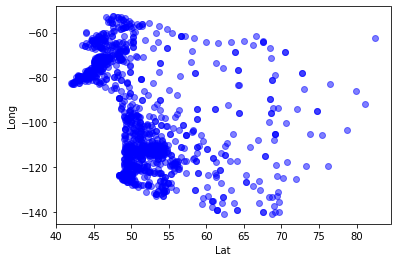

In [4]:
plt.scatter(data['Lat'], data['Long'], color='b', alpha=0.5)
plt.xlabel('Lat')
plt.ylabel('Long')
plt.show()

In Lat and Long columns we don't have null values:

In [5]:
print(pd.value_counts(pd.isna(data['Long'])))
print(pd.value_counts(pd.isna(data['Lat'])))

False    1256
Name: Long, dtype: int64
False    1256
Name: Lat, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler
X = data[['Lat', 'Long']]
print(X[0:5])
X = StandardScaler().fit_transform(X)
X[0:5]

      Lat     Long
0  48.935 -123.742
1  48.824 -124.133
2  48.829 -124.052
3  48.735 -123.728
4  48.432 -123.439


array([[-0.38421049, -1.14248704],
       [-0.40207206, -1.15922563],
       [-0.40126748, -1.15575805],
       [-0.41639349, -1.14188771],
       [-0.46515074, -1.1295157 ]])

In [7]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(X)
labels = db.labels_
data['Clusters'] = labels
print("we have these labels:", set(labels))
data.head()

we have these labels: {0, 1, 2, 3, -1}


,index,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,...,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,Clusters
0,0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,...,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500,0
1,1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,...,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040,0
2,2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,...,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055,0
3,4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,...,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573,0
4,5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,...,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710,0


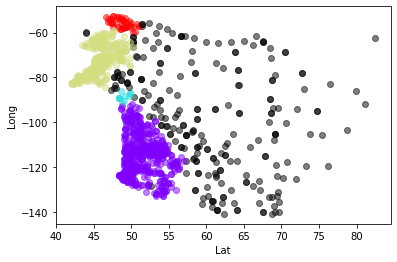

In [8]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(set(labels)) - 1))
for index, row in data.iterrows():
    if row['Clusters'] == -1:
        plt.scatter(row['Lat'], row['Long'], color='black', alpha=0.5)
    else:
        for label, color in zip(set(labels), colors):
            if row['Clusters'] == label:
                plt.scatter(row['Lat'], row['Long'], color=color, alpha=0.5)
plt.xlabel('Lat')
plt.ylabel('Long')
plt.show()